<a href="https://colab.research.google.com/github/HuangJin-De/am_NH/blob/main/discussion/20231115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
! rm -rf am_NH
! git clone https://github.com/HuangJin-De/am_NH.git

Cloning into 'am_NH'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 251 (delta 114), reused 143 (delta 48), pack-reused 0
Receiving objects: 100% (251/251), 8.31 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (114/114), done.


(42, 2, 10, 61)
slope =  0.8971026722390815
tao =  4.998443784168028


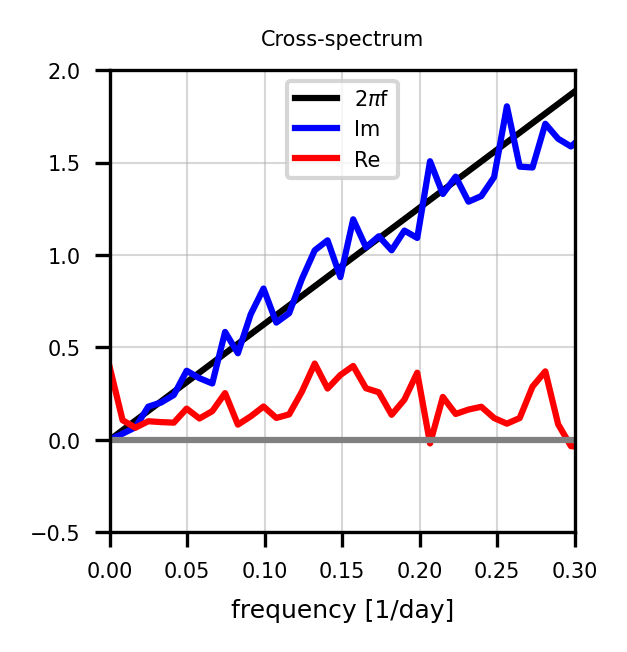

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

path='am_NH'
filen=path+'/train_data/ERA5_crossspectrum_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(42,2,10,-1)

n=38
x=np.arange(0,61)/121
x=x[0:n]

print(data.shape)
#print(x[0:38])

re=np.mean(data[:,0,0,:],0)[0:n]
im=np.mean(data[:,1,0,:],0)[0:n]

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,x*2*np.pi,'k',x,im,'b',x,re,'r',x,x*0.,'gray')
ax.tick_params(labelsize=5)
plt.legend(["2${\pi}$f","Im","Re"],fontsize=5,loc=9)
ax.set_ylim([-0.5,2])
ax.set_yticks(np.arange(-0.5,2.1,0.5))
ax.set_xlim([0,0.3])
ax.set_xticks(np.arange(0,0.31,0.05))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('frequency [1/day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Cross-spectrum',fontsize=5)


model=LinearRegression()
model.fit(x.reshape(-1,1),im.reshape(-1,1))

slope=model.coef_[0][0]/2./np.pi
tao=slope/np.mean(re,0)

print("slope = ",slope)
print("tao = ",tao)


<ipython-input-89-2e665aea4e94>:26: RuntimeWarning: invalid value encountered in log
  y1=np.diff(np.log(z1+np.min(z1)),0)/np.diff(x,0)
<ipython-input-89-2e665aea4e94>:26: RuntimeWarning: divide by zero encountered in divide
  y1=np.diff(np.log(z1+np.min(z1)),0)/np.diff(x,0)
<ipython-input-89-2e665aea4e94>:27: RuntimeWarning: invalid value encountered in log
  y2=np.diff(np.log(z2+np.min(z1)),0)/np.diff(x,0)
<ipython-input-89-2e665aea4e94>:27: RuntimeWarning: divide by zero encountered in divide
  y2=np.diff(np.log(z2+np.min(z1)),0)/np.diff(x,0)


Text(0.5, 1.0, 'Auto-correlation')

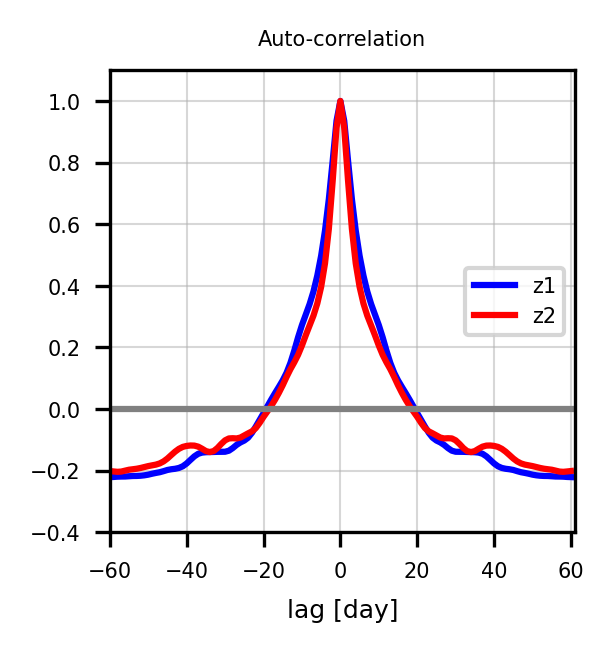

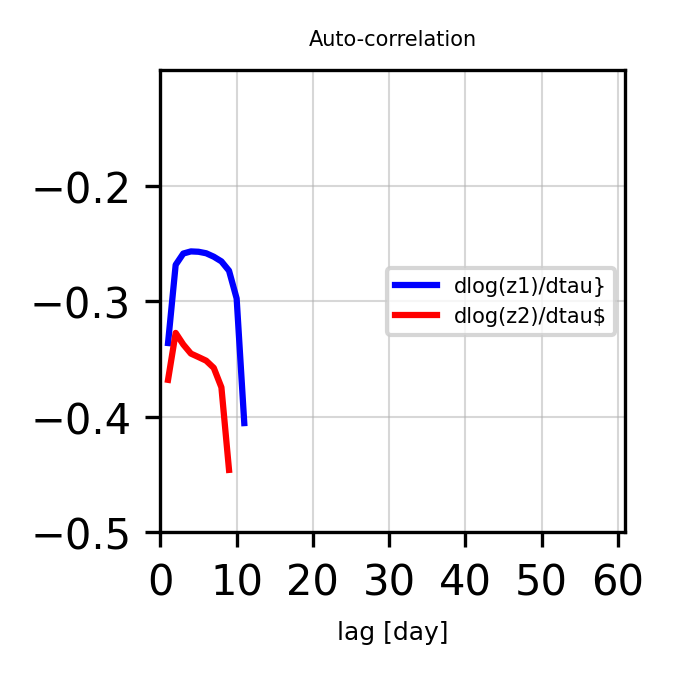

In [89]:
path='am_NH'
filen=path+'/train_data/ERA5_spectrum_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,34,121)

x=np.arange(-60,61)
z1=np.mean(data[:,0,:],0)
z2=np.mean(data[:,1,:],0)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,z1,'b',x,z2,'r',x,x*0.,'gray')
ax.tick_params(labelsize=5)
plt.legend(["z1","z2"],fontsize=5,loc=5)
ax.set_ylim([0.4,1.1])
ax.set_yticks(np.arange(-0.4,1.2,0.2))
ax.set_xlim([60,61])
ax.set_xticks(np.arange(-60,61.1,20.))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('lag [day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Auto-correlation',fontsize=5)



y1=np.diff(np.log(z1+np.min(z1)),0)/np.diff(x,0)
y2=np.diff(np.log(z2+np.min(z1)),0)/np.diff(x,0)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,y1,'b',x,y2,'r',x,x*0.,'gray')
plt.legend(["dlog(z1)/dtau}","dlog(z2)/dtau$"],fontsize=5,loc=5)
ax.set_ylim([-0.5,-0.1])
ax.set_yticks(np.arange(-0.5,-0.11,0.1))
ax.set_xlim([0,61])
ax.set_xticks(np.arange(0.,61.1,10.))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('lag [day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Auto-correlation',fontsize=5)

In [67]:
path='am_NH'
filen=path+'/train_data/zm_21days_ori_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,84)

z1=np.copy(data[:,0:21])
z2=np.copy(data[:,21:42])
m1=np.copy(data[:,42:63])
m2=np.copy(data[:,63:84])

print(z1.shape,z2.shape,m1.shape,m2.shape)
#print(z1[0,:])
#print(m1[0,:])

(4242, 21) (4242, 21) (4242, 21) (4242, 21)


estimations of b11, b12, b21, and b22.

In [68]:
def cal_reg_coef(x,y):
  model=LinearRegression()
  model.fit(x,y)
  return model.coef_


lag_z1z1=[]
lag_z1z2=[]
lag_z2z1=[]
lag_z2z2=[]
lag_m1z1=[]
lag_m1z2=[]
lag_m2z1=[]
lag_m2z2=[]

n=0
for i in np.arange(8,21):
  lag_z1z1.append(cal_reg_coef(z1[:,n].reshape(-1,1),z1[:,i].reshape(-1,1)))
  lag_z2z1.append(cal_reg_coef(z1[:,n].reshape(-1,1),z2[:,i].reshape(-1,1)))
  lag_z1z2.append(cal_reg_coef(z2[:,n].reshape(-1,1),z1[:,i].reshape(-1,1)))
  lag_z2z2.append(cal_reg_coef(z2[:,n].reshape(-1,1),z2[:,i].reshape(-1,1)))
  lag_m1z1.append(cal_reg_coef(z1[:,n].reshape(-1,1),m1[:,i].reshape(-1,1)))
  lag_m1z2.append(cal_reg_coef(z2[:,n].reshape(-1,1),m1[:,i].reshape(-1,1)))
  lag_m2z1.append(cal_reg_coef(z1[:,n].reshape(-1,1),m2[:,i].reshape(-1,1)))
  lag_m2z2.append(cal_reg_coef(z2[:,n].reshape(-1,1),m2[:,i].reshape(-1,1)))


#print(np.mean(lag_m1z1))
#print(np.mean(lag_m1z2))

a1=np.matrix([[np.mean(lag_z1z1), np.mean(lag_z2z1)],
 [np.mean(lag_z1z2), np.mean(lag_z2z2)]])
b1=np.matrix([[np.mean(lag_m1z1)], [np.mean(lag_m1z2)]])

x1=np.matmul(np.linalg.inv(a1),b1)

print("b11=",x1[0])
print("b12=",x1[1])

a2=np.matrix([[np.mean(lag_z2z1), np.mean(lag_z1z1)],
 [np.mean(lag_z2z2), np.mean(lag_z1z2)]])
b2=np.matrix([[np.mean(lag_m2z1)], [np.mean(lag_m2z2)]])

x2=np.matmul(np.linalg.inv(a2),b2)

print("b21=",x2[0])
print("b22=",x2[1])


print(a1)
print(b1)
print(a2)
print(b2)



b11= [[0.05786296]]
b12= [[0.02330417]]
b21= [[0.09109624]]
b22= [[-0.05169249]]
[[ 0.38850185 -0.07047598]
 [ 0.10965526  0.3179857 ]]
[[0.02083748]
 [0.01375537]]
[[-0.07047598  0.38850185]
 [ 0.3179857   0.10965526]]
[[-0.02650273]
 [ 0.02329895]]
